### CUSTOMER SEGMENTATION ANALYSIS

### Import required libraries

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [3]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\ifood_df.csv")

In [4]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [5]:
df.shape

(2205, 39)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Income                2205 non-null   int64
 1   Kidhome               2205 non-null   int64
 2   Teenhome              2205 non-null   int64
 3   Recency               2205 non-null   int64
 4   MntWines              2205 non-null   int64
 5   MntFruits             2205 non-null   int64
 6   MntMeatProducts       2205 non-null   int64
 7   MntFishProducts       2205 non-null   int64
 8   MntSweetProducts      2205 non-null   int64
 9   MntGoldProds          2205 non-null   int64
 10  NumDealsPurchases     2205 non-null   int64
 11  NumWebPurchases       2205 non-null   int64
 12  NumCatalogPurchases   2205 non-null   int64
 13  NumStorePurchases     2205 non-null   int64
 14  NumWebVisitsMonth     2205 non-null   int64
 15  AcceptedCmp3          2205 non-null   int64
 16  Accept

In [7]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [8]:
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

<Axes: xlabel='Age', ylabel='Density'>

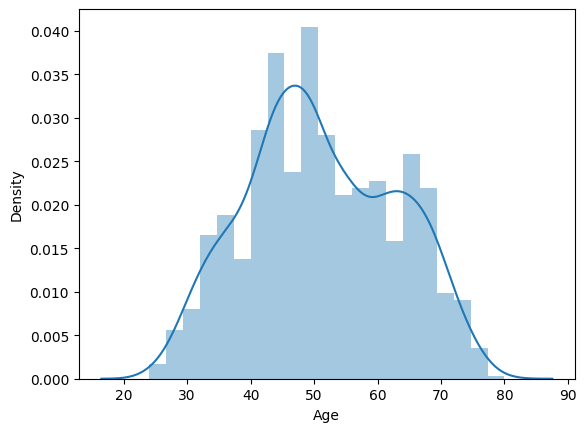

In [15]:
sns.distplot(df['Age'])

<Axes: >

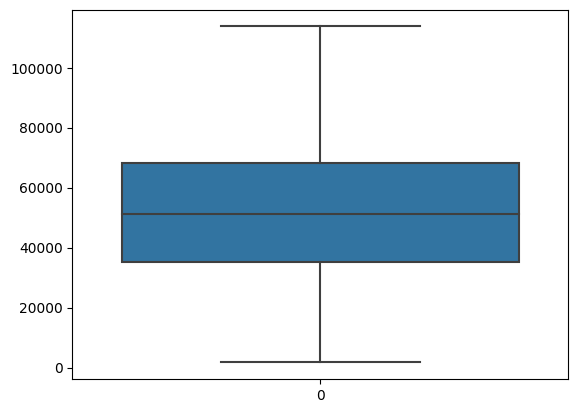

In [11]:
sns.boxplot(df['Income'])

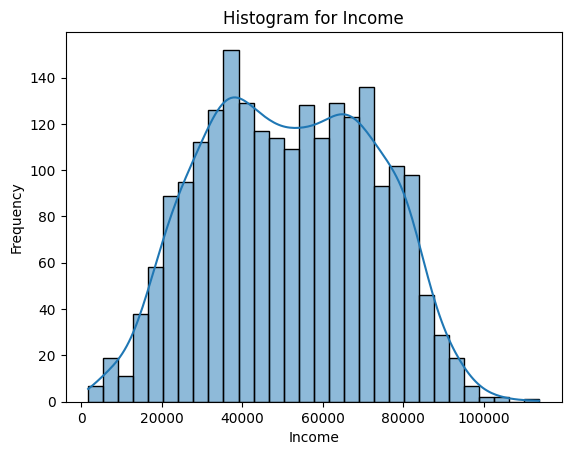

In [13]:
sns.histplot(data=df, x='Income', bins=30, kde=True)
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='MntTotal', ylabel='Density'>

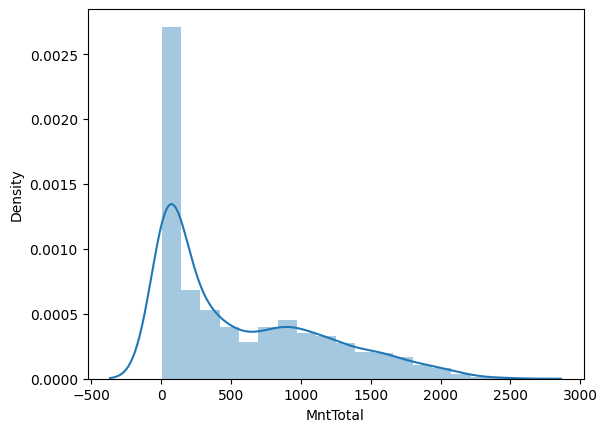

In [17]:
sns.distplot(df['MntTotal'])

In [23]:
df1=df[['Income','MntTotal']]

### Visualizing the data points using Scatter plot

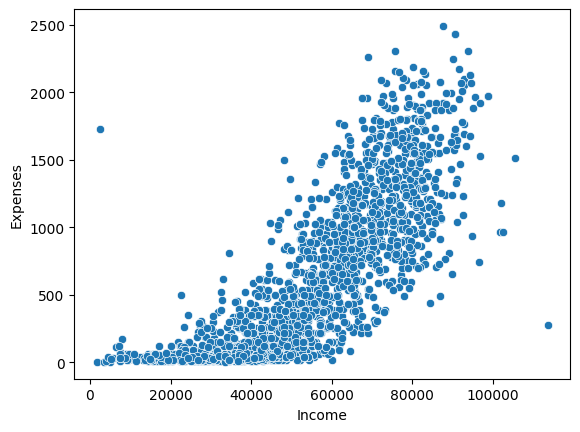

In [22]:
sns.scatterplot(x='Income', y='MntTotal', data=df)
plt.xlabel('Income')
plt.ylabel('Expenses')
plt.show()

### Data Preprocessing

In [25]:
# Standardize the data
sc = StandardScaler()
df1_sc = sc.fit_transform(df1)

### Building the clustering model

#### Finding optimal number of clusters(K value) by Elbow method
#### The elbow method is a graphical method for finding the optimal K value in a k-means clustering algorithm. 
#### The elbow graph shows the within-cluster-sum-of-square (WCSS) values on the y-axis corresponding to the different values of K (on the x-axis). 
#### The optimal K value is the point at which the graph forms an elbow.

#### Lets build the model with df1 and decide the number of clusters to be used.

In [27]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df1_sc)
    wcss.append(kmeans.inertia_)

In [28]:
wcss

[4410.0,
 1350.291218583262,
 836.4080869355589,
 574.2563578135675,
 460.14956953417357,
 385.07626468453384,
 333.7497693989621,
 290.3340791365422,
 263.85081850526853,
 241.07723090472075]

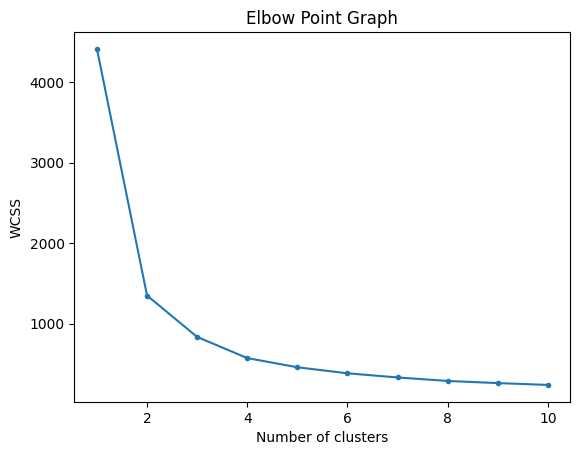

In [29]:
plt.plot(range(1,11),wcss,marker='.')
plt.title('Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

####  The value of K needs to be chosen where WCSS starts to diminish. In the plot WCSS versus K, this shows up as an elbow.
#### It looks like the optimal number of clusters is four.

### Model training

In [30]:
kmeans=KMeans(n_clusters=4,random_state=42)
x=kmeans.fit_predict(df1_sc)

In [31]:
x

array([0, 3, 2, ..., 2, 2, 3])

### Visualizing the clusters formed

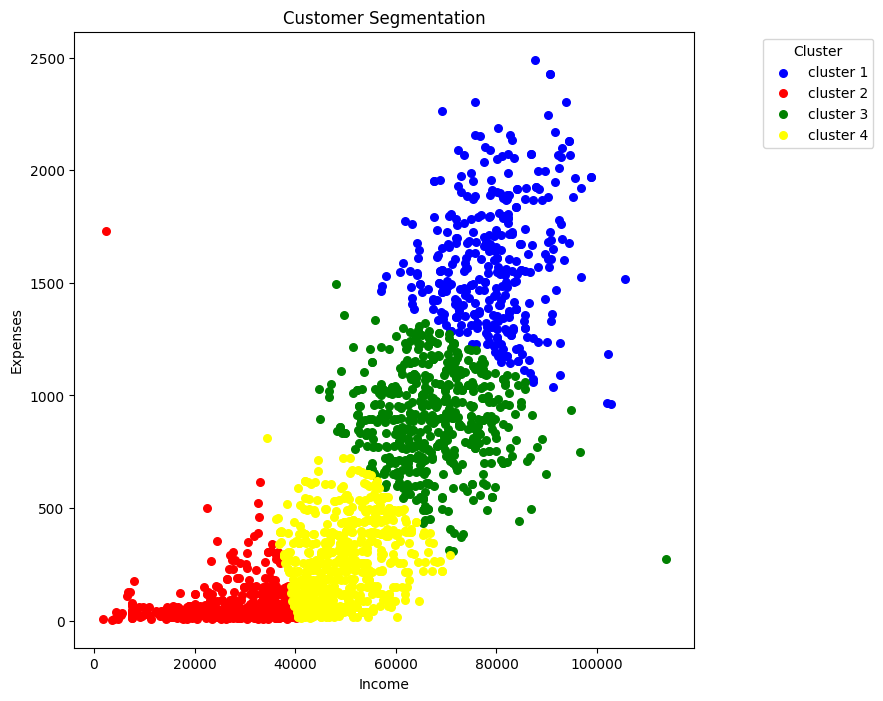

In [34]:
plt.figure(figsize=(8,8))
plt.scatter(df1.iloc[x==0,0],df1.iloc[x==0,1],s=30,c='blue',label='cluster 1')
plt.scatter(df1.iloc[x==1,0],df1.iloc[x==1,1],s=30,c='red',label='cluster 2')
plt.scatter(df1.iloc[x==2,0],df1.iloc[x==2,1],s=30,c='green',label='cluster 3')
plt.scatter(df1.iloc[x==3,0],df1.iloc[x==3,1],s=30,c='yellow',label='cluster 4')
plt.title('Customer Segmentation')
plt.xlabel('Income')
plt.ylabel('Expenses')
plt.legend(title='Cluster',loc="upper right",bbox_to_anchor=(1.3,1))
plt.show()

### Adding cluster label to each sample

In [35]:
df1['Label']=x
df1.head()

,Income,MntTotal,Label
0,58138,1529,0
1,46344,21,3
2,71613,734,2
3,26646,48,1
4,58293,407,3


### Interpreting the clusters by visualizing for each variable

Text(0.5, 1.0, 'Income by Cluster')

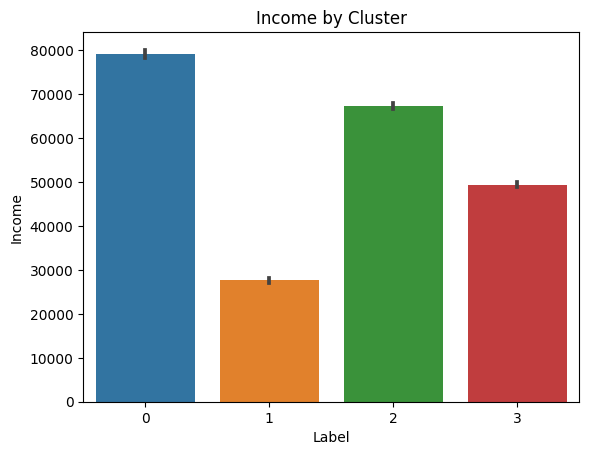

In [39]:
sns.barplot(x='Label',y='Income',data=df1)
plt.title('Income by Cluster')

Text(0.5, 1.0, 'MntTotal by Cluster')

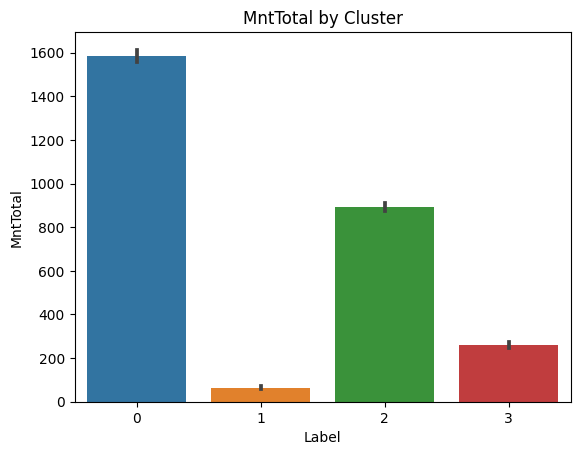

In [38]:
sns.barplot(x='Label',y='MntTotal',data=df1)
plt.title('MntTotal by Cluster')